In [2]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [44]:
#Read in surface stats
db = pickle.load(open('workspace/SFstats.pck','rb'))
#Read in LES output
file = 'workspace/LESoutput.pck'
les_db = pickle.load(open(file,'rb'))

In [45]:
#Assemble metrics
metrics = {}
for var in ['TKE','LWP']:
 metrics[var] = []
 #Perform analysis at each date
 for date in les_db:
     if (np.sum(les_db[date]['HMG'][var] != -9999) >= 90) & (np.sum(les_db[date]['HTG'][var] != -9999) >= 90):
         metrics[var].append(np.mean(les_db[date]['HTG'][var]-les_db[date]['HMG'][var]))
     else:
         metrics[var].append(-9999)
 metrics[var] = np.array(metrics[var])
 m = metric != -9999

0.5180101489505757


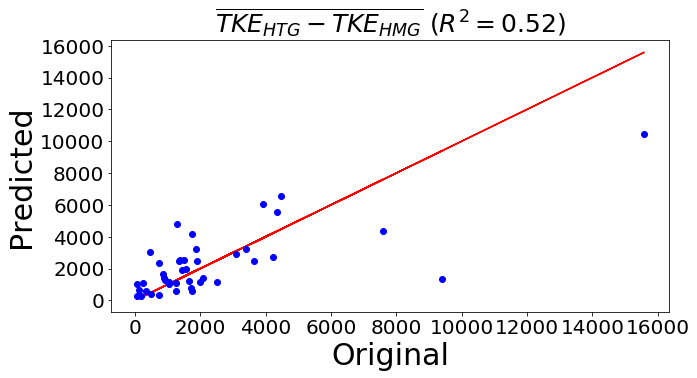

In [132]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics
var = 'TKE'
metric = metrics[var]
m2 = m #& (metric < 7000)
#X = np.array([db['SH_L0_0.75'][m2],db['SH_L90'][m2],db['SH_var'][m2],db['SH_skew'][m2],db['SH_kurt'][m2]]).T
#X = np.array([db['SH_L0_0.50'][m2],db['SH_L90_0.50'][m2],db['SH_var'][m2],db['SH_skew'][m2],db['SH_kurt'][m2]]).T
#X = np.array([db['sh_L0_0.75'][m2],db['sh_L90_0.75'][m2],
#              db['lw_L0_0.75'][m2],db['lw_L90_0.75'][m2],
#              db['lh_L0_0.75'][m2],db['lh_L90_0.75'][m2],
#              db['sh_var'][m2],db['lh_var'][m2],db['lw_var'][m2],
#              db['sh_skew'][m2],db['lh_skew'][m2],db['lw_skew'][m2],
#              db['sh_kurt'][m2],db['lh_kurt'][m2],db['lw_kurt'][m2],
#              db['ws'][m2],db['theta'][m2]]).T
X = np.array([db['sh_L0_0.75'][m2],db['sh_L90_0.75'][m2],
              db['sh_var'][m2]]).T
#X = np.array([db['SH_L0_0.75'][m2],db['SH_L0_0.50'][m2],db['SH_L0_0.25'][m2],db['SH_L90_0.75'][m2],db['SH_L90_0.50'][m2],db['SH_L90_0.25'][m2]]).T
y = metric[m2]
#regr = RandomForestRegressor(random_state=0,n_estimators=250,oob_score=True).fit(X,y)
regr = LinearRegression().fit(X, y)
ypred = regr.predict(X)
print(sklearn.metrics.explained_variance_score(y,ypred))
plt.figure(figsize=(10,5))
plt.plot(y,y,'r')
plt.plot(y,ypred,'bo')
plt.xlabel('Original',fontsize=30)
plt.ylabel('Predicted',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
if var == 'TKE':
 plt.title(r'$\overline{TKE_{HTG} - TKE_{HMG}}$ ($R^2 = %.2f$)' % sklearn.metrics.explained_variance_score(y,ypred),fontsize=25)
else:
 plt.title(r'$\overline{LWP_{HTG} - LWP_{HMG}}$ ($R^2 = %.2f$)' % sklearn.metrics.explained_variance_score(y,ypred),fontsize=25)
plt.show()

In [127]:
import sklearn.model_selection
clf = LinearRegression()
#clf = RandomForestRegressor(n_estimators=250)
scores = sklearn.model_selection.cross_val_score(clf,X,y,cv=2,scoring='explained_variance')
print(np.mean(scores))
scores = sklearn.model_selection.cross_val_score(clf,X,y,cv=2,scoring='r2')
#scores = sklearn.model_selection.cross_val_score(clf,X,y,cv=2,scoring='neg_mean_squared_error')
print(np.mean(scores))

0.5822170630790742
0.5813692785811126
